In [4]:
# !unzip "/content/drive/MyDrive/Corelia/archive.zip" -d "/content/airline data"

Archive:  /content/drive/MyDrive/Corelia/archive.zip
  inflating: /content/airline data/Invistico_Airline.csv  


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [6]:
df = pd.read_csv('/content/airline data/Invistico_Airline.csv')

In [7]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [8]:
df.value_counts(['satisfaction', 'Customer Type', 'Type of Travel'])

satisfaction  Customer Type      Type of Travel 
satisfied     Loyal Customer     Business travel    46688
dissatisfied  Loyal Customer     Personal Travel    21287
                                 Business travel    19426
satisfied     Loyal Customer     Personal Travel    18699
dissatisfied  disloyal Customer  Business travel    17911
satisfied     disloyal Customer  Business travel     5668
dissatisfied  disloyal Customer  Personal Travel      169
satisfied     disloyal Customer  Personal Travel       32
dtype: int64

<Axes: xlabel='satisfaction', ylabel='count'>

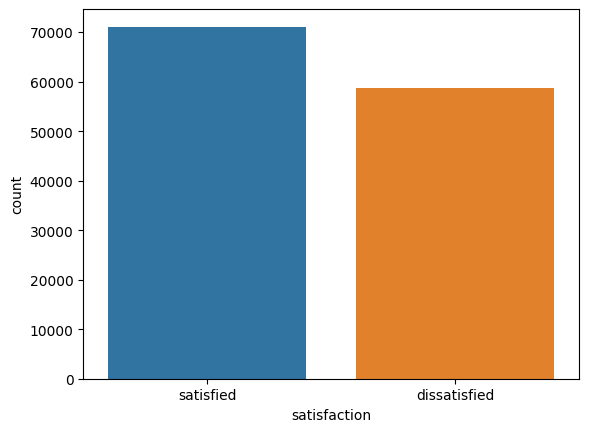

In [9]:
sns.countplot(df, x='satisfaction')

In [10]:
print(df['Type of Travel'].unique())
print(df['Customer Type'].unique())
print(df['Class'].unique())

['Personal Travel' 'Business travel']
['Loyal Customer' 'disloyal Customer']
['Eco' 'Business' 'Eco Plus']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [12]:
df[df['Arrival Delay in Minutes'].isna()].head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
145,satisfied,Loyal Customer,21,Personal Travel,Eco,4804,0,2,0,4,...,5,5,4,1,4,2,3,5,20,NaN
246,satisfied,Loyal Customer,28,Personal Travel,Eco,1364,0,3,0,4,...,4,2,1,1,3,4,3,2,0,NaN
710,satisfied,Loyal Customer,28,Personal Travel,Eco,1792,0,5,0,3,...,5,5,4,4,5,3,4,5,24,NaN
736,satisfied,Loyal Customer,9,Personal Travel,Eco,1862,0,5,0,4,...,3,3,5,3,4,4,4,3,0,NaN
818,dissatisfied,Loyal Customer,9,Personal Travel,Eco,1668,1,0,1,1,...,4,4,4,5,1,5,1,4,0,NaN
1162,dissatisfied,Loyal Customer,23,Personal Travel,Eco,4650,1,1,1,3,...,2,2,1,3,4,4,4,2,0,NaN
1267,satisfied,Loyal Customer,47,Personal Travel,Eco,846,0,5,0,5,...,2,3,3,0,3,5,3,5,0,NaN
1301,dissatisfied,Loyal Customer,32,Personal Travel,Eco,1772,1,1,1,3,...,1,4,4,1,2,4,3,4,22,NaN
1910,dissatisfied,Loyal Customer,47,Personal Travel,Eco,1396,1,2,1,3,...,4,4,1,1,4,4,4,4,17,NaN
2034,dissatisfied,Loyal Customer,24,Personal Travel,Eco,4196,1,2,1,4,...,3,3,3,1,4,1,4,3,92,NaN


In [13]:
new_df = df.copy()

In [14]:
new_df['Arrival Delay in Minutes'].fillna(0, inplace=True)

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [16]:
new_df = pd.get_dummies(new_df, columns= ['Class'])

In [17]:
new_df

,satisfaction,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,Loyal Customer,65,Personal Travel,265,0,0,0,2,2,...,0,3,5,3,2,0,0.0,0,1,0
1,satisfied,Loyal Customer,47,Personal Travel,2464,0,0,0,3,0,...,4,4,2,3,2,310,305.0,1,0,0
2,satisfied,Loyal Customer,15,Personal Travel,2138,0,0,0,3,2,...,3,4,4,4,2,0,0.0,0,1,0
3,satisfied,Loyal Customer,60,Personal Travel,623,0,0,0,3,3,...,0,1,4,1,3,0,0.0,0,1,0
4,satisfied,Loyal Customer,70,Personal Travel,354,0,0,0,3,4,...,0,2,4,2,5,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,1731,5,5,5,3,2,...,3,4,4,4,2,0,0.0,0,1,0
129876,dissatisfied,disloyal Customer,63,Personal Travel,2087,2,3,2,4,2,...,3,3,1,2,1,174,172.0,1,0,0
129877,dissatisfied,disloyal Customer,69,Personal Travel,2320,3,0,3,3,3,...,3,4,2,3,2,155,163.0,0,1,0
129878,dissatisfied,disloyal Customer,66,Personal Travel,2450,3,2,3,2,3,...,2,3,2,1,2,193,205.0,0,1,0


In [18]:
def convert_columns_to_binary(df, columns_to_convert):
    for column in columns_to_convert:
        # Create a dictionary to map classes to binary values
        class_mapping = {class_val: index for index, class_val in enumerate(df[column].unique())}

        # Apply the mapping to the column
        df[column] = df[column].map(class_mapping)

    return df

In [19]:
columns_to_convert = ['Type of Travel', 'Customer Type']
convert_columns_to_binary(new_df, columns_to_convert)

,satisfaction,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,0,65,0,265,0,0,0,2,2,...,0,3,5,3,2,0,0.0,0,1,0
1,satisfied,0,47,0,2464,0,0,0,3,0,...,4,4,2,3,2,310,305.0,1,0,0
2,satisfied,0,15,0,2138,0,0,0,3,2,...,3,4,4,4,2,0,0.0,0,1,0
3,satisfied,0,60,0,623,0,0,0,3,3,...,0,1,4,1,3,0,0.0,0,1,0
4,satisfied,0,70,0,354,0,0,0,3,4,...,0,2,4,2,5,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,1,29,0,1731,5,5,5,3,2,...,3,4,4,4,2,0,0.0,0,1,0
129876,dissatisfied,1,63,0,2087,2,3,2,4,2,...,3,3,1,2,1,174,172.0,1,0,0
129877,dissatisfied,1,69,0,2320,3,0,3,3,3,...,3,4,2,3,2,155,163.0,0,1,0
129878,dissatisfied,1,66,0,2450,3,2,3,2,3,...,2,3,2,1,2,193,205.0,0,1,0


In [20]:
class_mapping = {'satisfied':1, 'dissatisfied':0}
new_df['satisfaction'] = new_df['satisfaction'].map(class_mapping)

In [21]:
new_df

,satisfaction,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,65,0,265,0,0,0,2,2,...,0,3,5,3,2,0,0.0,0,1,0
1,1,0,47,0,2464,0,0,0,3,0,...,4,4,2,3,2,310,305.0,1,0,0
2,1,0,15,0,2138,0,0,0,3,2,...,3,4,4,4,2,0,0.0,0,1,0
3,1,0,60,0,623,0,0,0,3,3,...,0,1,4,1,3,0,0.0,0,1,0
4,1,0,70,0,354,0,0,0,3,4,...,0,2,4,2,5,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,29,0,1731,5,5,5,3,2,...,3,4,4,4,2,0,0.0,0,1,0
129876,0,1,63,0,2087,2,3,2,4,2,...,3,3,1,2,1,174,172.0,1,0,0
129877,0,1,69,0,2320,3,0,3,3,3,...,3,4,2,3,2,155,163.0,0,1,0
129878,0,1,66,0,2450,3,2,3,2,3,...,2,3,2,1,2,193,205.0,0,1,0


In [22]:

def standardNormalize(x):
  return ((x- np.mean(x))/np.std(x))

def linearNormalize(x):
  return (x-np.min(x))/(np.max(x)-np.min(x))


In [23]:
norm_df = linearNormalize(new_df)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [24]:
norm_df.head()

,satisfaction,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,1.0,0.0,0.743590,0.0,0.031155,0.0,0.0,0.0,0.4,0.4,...,0.0,0.50,1.0,0.6,0.4,0.000000,0.000000,0.0,1.0,0.0
1,1.0,0.0,0.512821,0.0,0.349804,0.0,0.0,0.0,0.6,0.0,...,0.8,0.75,0.4,0.6,0.4,0.194724,0.192551,1.0,0.0,0.0
2,1.0,0.0,0.102564,0.0,0.302565,0.0,0.0,0.0,0.6,0.4,...,0.6,0.75,0.8,0.8,0.4,0.000000,0.000000,0.0,1.0,0.0
3,1.0,0.0,0.679487,0.0,0.083031,0.0,0.0,0.0,0.6,0.6,...,0.0,0.00,0.8,0.2,0.6,0.000000,0.000000,0.0,1.0,0.0
4,1.0,0.0,0.807692,0.0,0.044052,0.0,0.0,0.0,0.6,0.8,...,0.0,0.25,0.8,0.4,1.0,0.000000,0.000000,0.0,1.0,0.0


<Axes: >

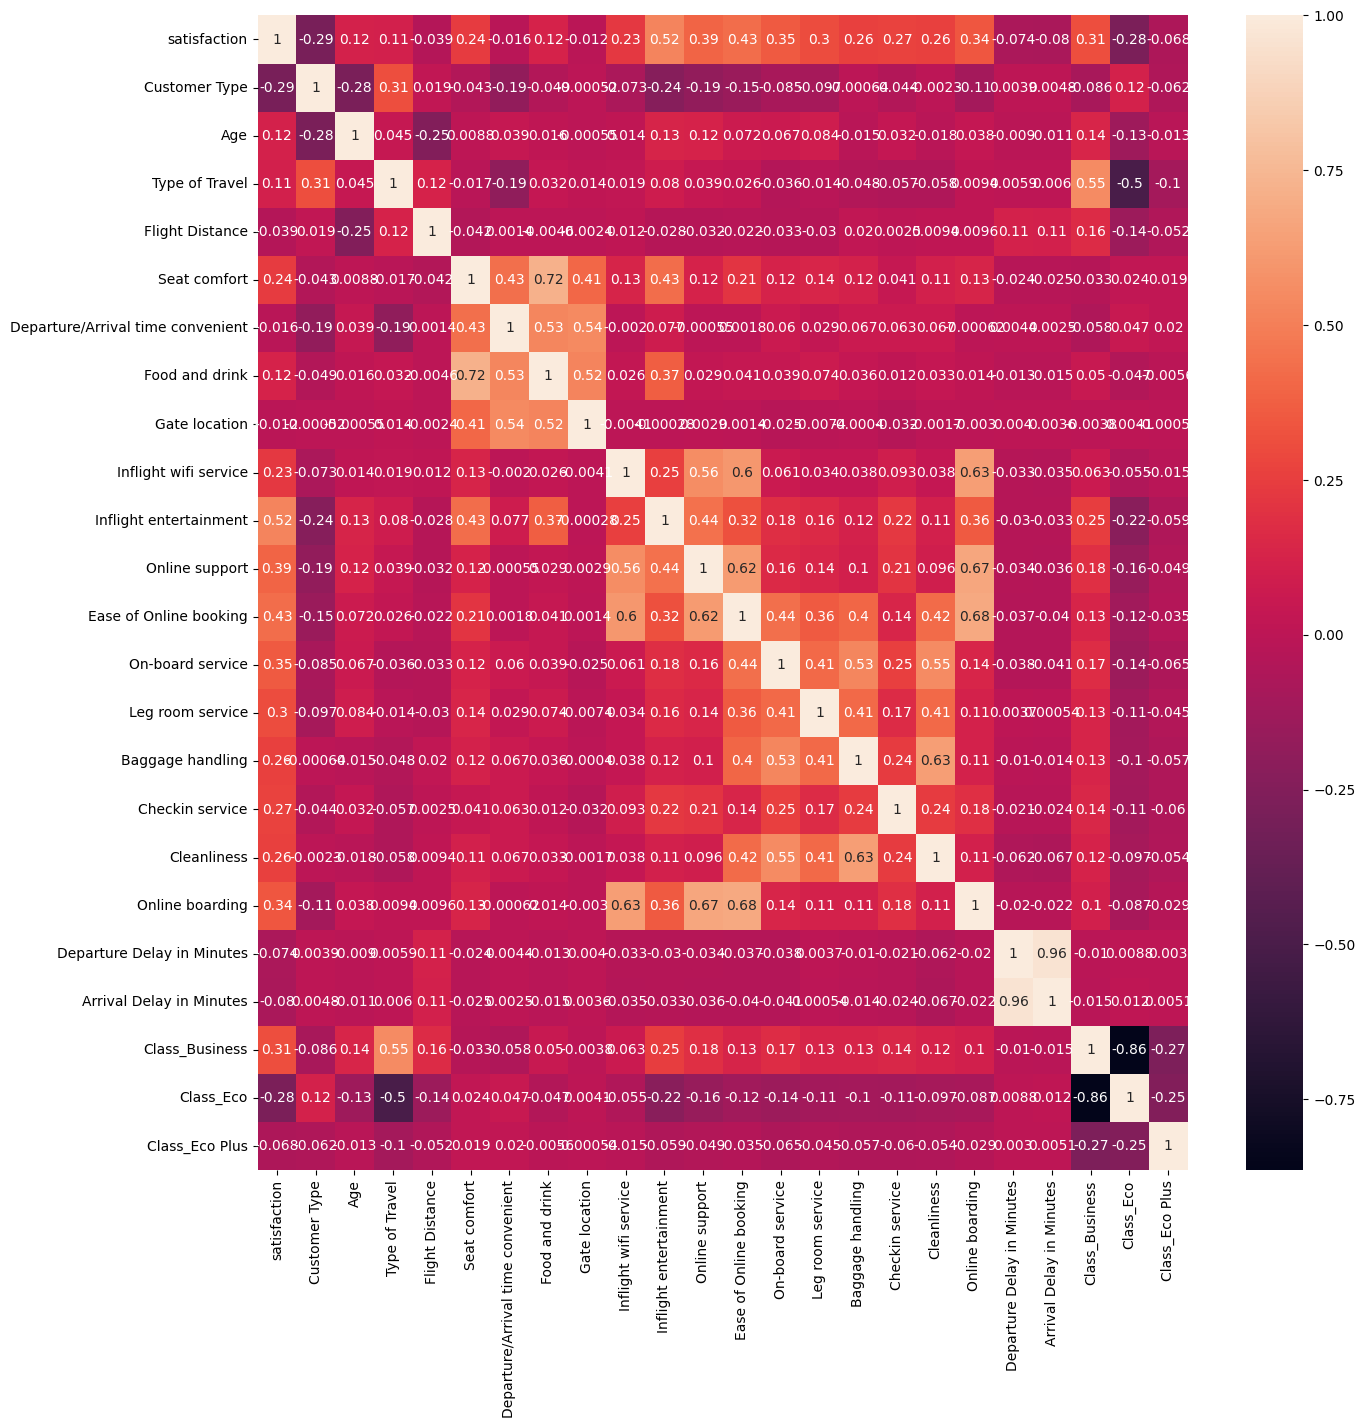

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(norm_df.corr(), annot=True)

In [26]:
target = norm_df['satisfaction']
X = norm_df.drop(['satisfaction'], axis=1)

In [27]:
X_train = X.sample(frac=0.8, random_state=42)
X_test = X.drop(X_train.index)

y_train =  target.filter(X_train.index, axis=0)
y_test = target.filter(X_test.index, axis=0)

In [28]:
X_train.head()

,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
103044,0.0,0.666667,1.0,0.205767,0.8,0.8,0.8,0.8,1.0,0.8,...,0.8,0.75,1.0,0.8,0.6,0.004397,0.000000,1.0,0.0,0.0
43282,1.0,0.192308,1.0,0.249384,0.2,0.2,0.2,0.8,0.8,0.2,...,0.8,0.50,0.2,0.8,0.8,0.000000,0.000000,0.0,1.0,0.0
65543,0.0,0.615385,1.0,0.522678,0.0,1.0,0.0,0.4,0.8,1.0,...,0.8,0.75,0.6,0.8,0.6,0.007538,0.005051,1.0,0.0,0.0
65083,0.0,0.435897,1.0,0.253007,0.0,0.8,0.0,0.2,0.4,0.8,...,0.6,0.50,1.0,0.6,0.6,0.000000,0.000000,1.0,0.0,0.0
76496,0.0,0.448718,1.0,0.240400,0.4,0.6,0.6,0.6,0.4,0.4,...,0.8,0.75,0.2,0.6,0.4,0.000000,0.000000,0.0,1.0,0.0


In [29]:
y_train.head()

103044    1.0
43282     0.0
65543     1.0
65083     1.0
76496     0.0
Name: satisfaction, dtype: float64

In [30]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def loss(h, y): #is the result from the sigmoid function and y the target class
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def gradient_descent(X, h, y):
  return np.dot(X.T, (h - y)) / y.shape[0]

def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [31]:
start_time = time.time()
num_iter = 20000
lr = 0.1

intercept = np.ones((X_train.shape[0], 1))
intercept_test = np.ones((X_test.shape[0], 1))
X = np.concatenate((intercept, X_train), axis = 1)
X_test = np.concatenate((intercept_test, X_test), axis = 1)
theta = np.zeros(X.shape[1]) #weight initialisation
y = y_train

for i in range(num_iter):
  z= np.dot(X, theta)
  h = sigmoid(z)
  gradient = gradient_descent(X, h, y)
  theta = update_weight_loss(theta, lr, gradient)

print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print(f"Learning rate: {lr}\nIteration: {num_iter}")

Training time (Log Reg using Gradient descent):142.226309299469 seconds
Learning rate: 0.1
Iteration: 20000


In [32]:
def predict(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return (h >= 0.5).astype(int)

In [33]:
y_pred = predict(X_test, theta)

# Print the model's accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 82.73791191869418%


#SVM

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
data_norm = norm_df

In [44]:

class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=100):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y == 0, 0, 1)

        # init weights
        self.w = np.zeros(n_features)
        self.b = 0

        for a in range(self.n_iters):
            print(f"Iteration {a}...")
            for i in range(len(X)):
                condition = y_[i] * (np.dot(X.iloc[i], self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(X.iloc[i], y_[i]))
                    self.b -= self.lr * y_[i]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [45]:
X = data_norm.drop(['satisfaction'], axis = 1)
y = data_norm['satisfaction']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

clf = SVM()
start = time.time()
clf.fit(X_train, y_train)
print("Training time:" + str(time.time() - start) + " seconds")

predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("SVM classification accuracy", accuracy(y_test, predictions))

Iteration 0...
Iteration 1...
Iteration 2...
Iteration 3...
Iteration 4...
Iteration 5...
Iteration 6...
Iteration 7...
Iteration 8...
Iteration 9...
Iteration 10...
Iteration 11...
Iteration 12...
Iteration 13...
Iteration 14...
Iteration 15...
Iteration 16...
Iteration 17...
Iteration 18...
Iteration 19...
Iteration 20...
Iteration 21...
Iteration 22...
Iteration 23...
Iteration 24...
Iteration 25...
Iteration 26...
Iteration 27...
Iteration 28...
Iteration 29...
Iteration 30...
Iteration 31...
Iteration 32...
Iteration 33...
Iteration 34...
Iteration 35...
Iteration 36...
Iteration 37...
Iteration 38...
Iteration 39...
Iteration 40...
Iteration 41...
Iteration 42...
Iteration 43...
Iteration 44...
Iteration 45...
Iteration 46...
Iteration 47...
Iteration 48...
Iteration 49...
Iteration 50...
Iteration 51...
Iteration 52...
Iteration 53...
Iteration 54...
Iteration 55...
Iteration 56...
Iteration 57...
Iteration 58...
Iteration 59...
Iteration 60...
Iteration 61...
Iteration 62...
It